# Analyzing Yahoo Finance Stock Price Data

In this project, we practice using dictionaries to analyze historical data on prices for several hundred stocks. The data came from Yahoo Finance, and it was provided by Dataquest. Each stock's data is in a seperate csv file, and they are all stored in the 'prices' folder. 

## Reading the Data into a Single Data Structure

In [2]:
import os
import pandas as pd

In [3]:
prices_dict = {}
for name in os.listdir('prices'):
    df = pd.read_csv(os.path.join("prices", name))
    prices_dict[name[:-4]] = df

In [4]:
prices_dict['aapl'].head() #Here are the first few rows of the data for Apple stock

,date,close,open,high,low,volume
0,2007-01-03,83.800002,86.289999,86.579999,81.899999,309579900
1,2007-01-04,85.659998,84.050001,85.949998,83.820003,211815100
2,2007-01-05,85.049997,85.770000,86.199997,84.400002,208685400
3,2007-01-08,85.470000,85.959998,86.529998,85.280003,199276700
4,2007-01-09,92.570003,86.450003,92.979999,85.150000,837324600


## Finding Stocks with the Minimum and Maximum Average Closing Price

In [5]:
ave_closing_price_dict = {}
for key in prices_dict:
    ave_closing_price_dict[key] = prices_dict[key]['close'].mean()

In [6]:
ave_close_df = pd.DataFrame.from_dict(ave_closing_price_dict, orient='index', columns=['ave_close_price'])

In [7]:
ave_close_df.sort_values(by='ave_close_price').head(1) #Stock with lowest average closing price

,ave_close_price
blfs,0.812276


In [8]:
ave_close_df.sort_values(by='ave_close_price', ascending=False).head(1) #Stock with highest average closing price

,ave_close_price
amzn,275.134078


## Grouping Trades per Day

In [9]:
dates_dict = {}
for key in prices_dict:
    df = prices_dict[key]
    for index, row in df.iterrows():
        date = row['date']
        if date in dates_dict:
            dates_dict[date].append((key, row['volume']))
        else:
            dates_dict[date] = [(key, row['volume'])]

In [10]:
dates_dict['2007-01-03'][:10]

[('cme', 3981500),
 ('arwr', 4500),
 ('abcb', 30900),
 ('bwen', 2700),
 ('bios', 91300),
 ('bkmu', 201200),
 ('ctib', 163700),
 ('abco', 523000),
 ('apps', 0),
 ('casc', 454200)]

Above, we see that we have created a dictionary where each key is date and each value is a list of tuples containing the name and volume of each stock traded on that day. 

## Finding the Stock with the Highest Volume for Each Day

In [11]:
top_stock_dict = {}
for key in dates_dict:
    df = pd.DataFrame(dates_dict[key])
    top_val = df.sort_values(by=1, ascending=False).head(1)
    top_stock_dict[key] = tuple(top_val[1]) + tuple(top_val[0])

In [12]:
top_stock_dict['2007-01-03'] #For example, Apple was the stock with the highest volume on 01/03/2007.

(309579900, 'aapl')

## Finding the Days with the Highest Volume

In [13]:
total_volume_day_dict = {}
for day in dates_dict:
    df = pd.DataFrame(dates_dict[day])
    total_volume_day_dict[day] = df[1].sum()

In [14]:
total_volume_df = pd.DataFrame.from_dict(total_volume_day_dict, orient='index')

In [15]:
total_volume_df[0].sort_values(ascending=False).head(10)

2008-01-23    1964583900
2008-10-10    1770266900
2007-07-26    1611272800
2008-10-08    1599183500
2008-01-22    1578877700
2008-02-07    1559032100
2008-09-29    1555072400
2007-11-08    1553880500
2008-01-16    1536176400
2008-01-24    1533363200
Name: 0, dtype: int64

Above, we see that the highest volume days are all in 2007 and 2008. This makes sense as it would correspond to the financial crisis. 

In [16]:
import matplotlib.pyplot as plt

In [17]:
total_volume_df['30_day_avg'] = total_volume_df[0].rolling(30, closed= "left").mean()

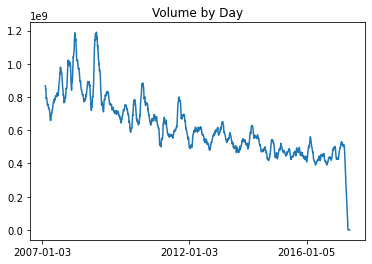

In [18]:
plt.plot(total_volume_df.index, total_volume_df['30_day_avg'])
plt.xticks(['2007-01-03', '2012-01-03', '2016-01-05'])
plt.title('Volume by Day')
plt.show()

Here, we see that total volume was generally higher in 2007-2008, and has generally declined since then. This could be because of the financial crisis, and the rise in passively managed index funds. 

## Finding the Most Profitable Stocks Over the Time Period

In [19]:
profits_dict = {}
for stock in prices_dict:
    df = prices_dict[stock]
    start_price = df.loc[1, 'close']
    end_price = df.loc[len(df.index) - 1, 'close']
    profit = (end_price - start_price)/ start_price * 100
    profits_dict[stock] = profit

In [20]:
profits_df = pd.DataFrame.from_dict(profits_dict, orient='index')

In [21]:
profits_df[0].sort_values(ascending=False).head(10)

admp    7483.838923
adxs    4361.956522
arcw    3898.600490
blfs    2437.436564
amzn    2218.740215
apdn    1732.966740
anip    1707.355447
axgn    1571.428571
cui     1525.162516
achc    1283.871032
Name: 0, dtype: float64

In [24]:
profits_df[0].mean()

126.32237672563738

Above, we see the ten most profitable stocks in the data, and we see that the average stock profit over the time period was 126%. 